In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

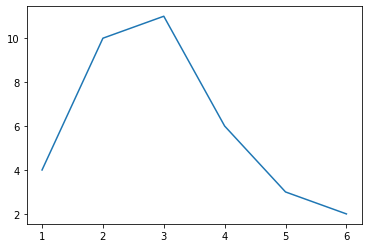

In [11]:
nLand = 24
nCreatureDict = {
    1 : 4,
    2 : 10,
    3 : 11,
    4 : 6,
    5 : 3,
    6 : 2
}

plt.figure()
plt.plot(nCreatureDict.keys(), nCreatureDict.values())
plt.show()

In [19]:
# Add lands to deck 
deck = [-1]*24

# Add nonlands to deck
for k,v in nCreatureDict.items():
    deck += [k]*v
    
deck = np.array(deck)

In [37]:
def count_cards(hand, cost):
    return np.sum(hand == cost)

def count_lands(hand):
    return count_cards(hand, -1)

def count_lands_start(hand):
    return count_lands(hand[:7])

def can_deploy_oncurve(hand, cost):
    handEff = hand[:7 + cost - 1]
    haveLands = count_lands(handEff) >= cost
    haveCard = count_cards(handEff, cost) > 0
    return haveCard and haveLands

In [38]:
# Test
hand = np.random.choice(deck, size=11, replace=False)

print(hand)
print(count_lands_start(hand))
print(can_deploy_oncurve(hand, 2))
print(can_deploy_oncurve(hand, 3))
print(can_deploy_oncurve(hand, 4))

[-1 -1 -1 -1  2  2 -1 -1  5  3  4]
5
True
False
False


In [39]:
# Perform simulation
rezLst = []
for iTest in range(100000):
    # Test
    hand = np.random.choice(deck, size=11, replace=False)
    rezLst += [[
        count_lands_start(hand),
        can_deploy_oncurve(hand, 2),
        can_deploy_oncurve(hand, 3),
        can_deploy_oncurve(hand, 4)
    ]]
    
df = pd.DataFrame(rezLst, columns=['lands_start', 'play2', 'play3', 'play4'])

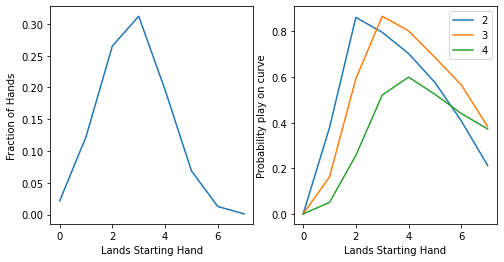

In [44]:
# Analyse data
x = np.arange(8)
frac = []
n2 = []
n3 = []
n4 = []

for iLand in range(8):
    dfLand = df[df['lands_start'] == iLand]
    df2 = dfLand[dfLand['play2']]
    df3 = dfLand[dfLand['play3']]
    df4 = dfLand[dfLand['play4']]
    
    frac += [len(dfLand) / len(df)]
    n2 += [len(df2) / len(dfLand)]
    n3 += [len(df3) / len(dfLand)]
    n4 += [len(df4) / len(dfLand)]


fig,ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].plot(x, frac)
ax[1].plot(x, n2, label='2')
ax[1].plot(x, n3, label='3')
ax[1].plot(x, n4, label='4')
ax[1].legend()
ax[0].set_xlabel('Lands Starting Hand')
ax[1].set_xlabel('Lands Starting Hand')
ax[0].set_ylabel('Fraction of Hands')
ax[1].set_ylabel('Probability play on curve')
plt.show()